# Zajęcie 2: Metoda gradientu prostego. Stosowanie do algorytmu wstecznej propagacji błędu

https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795
https://github.com/SkalskiP/ILearnDeepLearning.py/blob/master/01_mysteries_of_neural_networks/03_numpy_neural_net/Numpy%20deep%20neural%20network.ipynb

## Wizualizacja metody gradientu z użyciem tensorflow

### Imports

In [1]:
import math

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/Users/kacper/projects/mk/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Example 1

In [2]:
x = tf.Variable(2.0)
y = tf.Variable(5.0)
target_fn = lambda x,y: math.pow(math.e, math.sqrt(x + 3 * y))
sgd = tf.keras.optimizers.legacy.SGD(0.1)

In [3]:
""" derivative_tar_on_x = 6x = 12
    derivetive_tar_on_y = 4y = 20 """
with tf.GradientTape() as g:
    g.watch(x)
    g.watch(y)
    t= target_fn(x,y)
    gradients = g.gradient(t, sources=[x, y])
    print(gradients) # 12, 20

[<tf.Tensor: shape=(), dtype=float32, numpy=12.0>, <tf.Tensor: shape=(), dtype=float32, numpy=20.0>]


In [4]:
sgd.apply_gradients(zip(gradients, [x, y]))
print(x) # 2 - 0.1 * 12 = 0.8
print(y) # 5 - 0.1 * 20 = 3.0

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.79999995>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


In [5]:
while abs(target_fn(x,y) - 0) >= 0.01:
     with tf.GradientTape() as tp:
            t= target_fn(x,y)
            gradients = g.gradient(t, sources=[x, y])
            n = optimizer.minimize(target_fn(x,y), var_list=[x, y])

RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

In [6]:
# 3D cost figure
for angle in range(0, 180):
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(8,8))
    ax = Axes3D(fig)
    x3D, y3D = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))  # parameter space
    cost3D = np.array([np.mean(np.square(target_fn(x_,y_) - y)) for x_, y_ in zip(x3D.flatten(), y3D.flatten())]).reshape(x3D.shape)
    ax.plot_surface(x3D, y3D, cost3D, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'), alpha=0.6)
    ax.scatter(x_list[0], y_list[0], zs=cost_list[0], s=300, c='r')  # initial parameter place
    ax.set_xlabel('x'); ax.set_ylabel('y')
    ax.plot(a_list[:angle], b_list[:angle], zs=cost_list[:angle], zdir='z', c='r', lw=3)    # plot 3D gradient descent
    ax.view_init(30 + (90 - angle)/5, 45 + angle*2)
    plt.savefig("./" + OUTPUT_DIR + "/" + makeIndexOfLength(angle, 3) + ".png")
    plt.close()

NameError: name 'x_list' is not defined

<Figure size 800x800 with 0 Axes>

### Example 2

### Settings

In [7]:
# learning rate
LR = 0.04
# parameters a and b of the real function
REAL_PARAMS = [1.2, 2.5]
# starting point for gradient descent
INIT_PARAMS = [-1, -1.5]
# output directory (the folder must be created on the drive)
OUTPUT_DIR = "gradient_descent"

### Auxiliary function

In [8]:
# precede the number with zeros, creating a thong of a certain length
def makeIndexOfLength(index, length):
    indexStr = str(index)
    return ('0' * (length - len(indexStr)) + indexStr)

### Performing the simulation

In [9]:
#x_ = np.linspace(-1, 1, 200, dtype=np.float32)
x_ = [-1,1]
x = [tf.Variable(initial_value=p, dtype=tf.float32) for p in x_]

y_fun = lambda: np.sin(b*np.cos(a*x))
tf_y_fun = lambda: tf.sin(b*tf.cos(a*x))

#noise = np.random.randn(200)/10
noise = np.random.randn(2)/10
#y = y_fun(*REAL_PARAMS) + noise
y = y_fun() + noise

# tensorflow graph
a, b = [tf.Variable(initial_value=p, dtype=tf.float32) for p in INIT_PARAMS]
pred = tf_y_fun()
mse = tf.reduce_mean(tf.square(y-pred))
#train_op = tf.train.GradientDescentOptimizer(LR).minimize(mse)

with tf.GradientTape() as g:
    g.watch(a)
    g.watch(b)
    t= y_fun()
    gradients = g.gradient(t, sources=[a,b])

optimizer = tf.optimizers.legacy.SGD(LR)

train_op = optimizer.minimize(loss=mse,var_list=[a,b])


a_list, b_list, cost_list = [], [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for s in range(180):
        a_, b_, mse_ = sess.run([a, b, mse])
        a_list.append(a_); b_list.append(b_); cost_list.append(mse_)
        result, _ = sess.run([pred, train_op])                          

NameError: name 'b' is not defined

In [ ]:
x

###  Creates visualization

In [10]:
# 3D cost figure
for angle in range(0, 180):
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(8,8))
    ax = Axes3D(fig)
    a3D, b3D = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))  # parameter space
    cost3D = np.array([np.mean(np.square(y_fun(a_, b_) - y)) for a_, b_ in zip(a3D.flatten(), b3D.flatten())]).reshape(a3D.shape)
    ax.plot_surface(a3D, b3D, cost3D, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'), alpha=0.6)
    ax.scatter(a_list[0], b_list[0], zs=cost_list[0], s=300, c='r')  # initial parameter place
    ax.set_xlabel('a'); ax.set_ylabel('b')
    ax.plot(a_list[:angle], b_list[:angle], zs=cost_list[:angle], zdir='z', c='r', lw=3)    # plot 3D gradient descent
    ax.view_init(30 + (90 - angle)/5, 45 + angle*2)
    plt.savefig("./" + OUTPUT_DIR + "/" + makeIndexOfLength(angle, 3) + ".png")
    plt.close()

TypeError: <lambda>() takes 0 positional arguments but 2 were given

<Figure size 800x800 with 0 Axes>

### Expected results

Go to OUTPUT_DIR, which should now be filled with subsequent keyframes of our animation. All the resulting images look more or less like this.

<img src="./final_visualisations/frames.png" alt="All frames">

Now all you need to do is enter OUTPUT_DIR and use ImageMagick to create a final gift with one command.

```bash
convert -delay 10 -loop 0 *.png keras_class_boundaries.gif
```

<img src="./final_visualisations/gradient_descent.gif" alt="Gradient descent">

## Implementacja "od zera" (użycie numpy)

In [60]:
import numpy as np

## Architektura

In [61]:
nn_architecture = [
    {"input_dim": 2, "output_dim": 2, "activation": "sigmoid"},
    {"input_dim": 2, "output_dim": 1, "activation": "sigmoid"}
]

In [62]:
def init_layers(nn_architecture, seed = 99):
    np.random.seed(seed)
    number_of_layers = len(nn_architecture)
    params_values = {}

    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        print(idx)
        print(layer)
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1
        
    return params_values

## Activation functions

In [63]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

## Forward propagation

In [64]:
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
    print(A_prev.shape)
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    
    if activation == "relu":
        activation_func = relu
    elif activation == "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('Non-supported activation function')
        
    return activation_func(Z_curr), Z_curr

In [65]:
def full_forward_propagation(X, params_values, nn_architecture):
    memory = {}
    A_curr = X
    
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        A_prev = A_curr
        
        activ_function_curr = layer["activation"]
        W_curr = params_values["W" + str(layer_idx)]
        b_curr = params_values["b" + str(layer_idx)]
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)
        
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
       
    return A_curr, memory

# Loss function (binary cross-entropy)

In [66]:
def get_cost_value(Y_hat, Y):
    m = Y_hat.shape[1]
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)

# an auxiliary function that converts probability into class
def convert_prob_into_class(probs):
    probs_ = np.copy(probs)
    probs_[probs_ > 0.5] = 1
    probs_[probs_ <= 0.5] = 0
    return probs_

def get_accuracy_value(Y_hat, Y):
    Y_hat_ = convert_prob_into_class(Y_hat)
    return (Y_hat_ == Y).all(axis=0).mean()

## Backward propagation

$$\boldsymbol{dW}^{[l]} = \frac{\partial L }{\partial \boldsymbol{W}^{[l]}} = \frac{1}{m} \boldsymbol{dZ}^{[l]} \boldsymbol{A}^{[l-1] T}$$



$$\boldsymbol{db}^{[l]} = \frac{\partial L }{\partial \boldsymbol{b}^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} \boldsymbol{dZ}^{[l](i)}$$

$$\boldsymbol{dA}^{[l-1]} = \frac{\partial L }{\partial \boldsymbol{A}^{[l-1]}} = \boldsymbol{W}^{[l] T} \boldsymbol{dZ}^{[l]}$$

$$\boldsymbol{dZ}^{[l]} = \boldsymbol{dA}^{[l]} * g'(\boldsymbol{Z}^{[l]})$$

In [67]:
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    m = A_prev.shape[1]
    
    if activation == "relu":
        backward_activation_func = relu_backward
    elif activation == "sigmoid":
        backward_activation_func = sigmoid_backward
    else:
        raise Exception('Non-supported activation function')
    
    dZ_curr = backward_activation_func(dA_curr, Z_curr)
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr

$$\frac{\partial L }{\partial \boldsymbol{\hat{Y}}} = -(\frac{\boldsymbol{Y}}{\boldsymbol{\hat{Y}}}- \frac{1-\boldsymbol{Y}}{1-\boldsymbol{\hat{Y}}})$$

In [68]:
def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}
    m = Y.shape[1]
    Y = Y.reshape(Y_hat.shape)
   
    dA_prev = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat));
    
    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        layer_idx_curr = layer_idx_prev + 1
        activ_function_curr = layer["activation"]
        
        dA_curr = dA_prev
        
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]
        
        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)
        
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr
    
    return grads_values

## Updating the parameters (Gradient descent)

In [69]:
def update(params_values, grads_values, nn_architecture, learning_rate):
    for layer_idx, layer in enumerate(nn_architecture):
        params_values["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]        
        params_values["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]

    return params_values;

## Training (putting things together): Error backpropagation algorithm

In [70]:
def train(X, Y, nn_architecture, epochs, learning_rate):
    params_values = init_layers(nn_architecture, 2)
    cost_history = []
    accuracy_history = []
    
    for i in range(epochs):
        Y_hat, cashe = full_forward_propagation(X, params_values, nn_architecture)
        cost = get_cost_value(Y_hat, Y)
        cost_history.append(cost)
        accuracy = get_accuracy_value(Y_hat, Y)
        accuracy_history.append(accuracy)
        
        grads_values = full_backward_propagation(Y_hat, Y, cashe, params_values, nn_architecture)
        params_values = update(params_values, grads_values, nn_architecture, learning_rate)
        
    return params_values, cost_history, accuracy_history

## Example

In [71]:
x = np.array([[1,2],[3,4],[2,3],[4,5]])
y = np.array([[3],[4],[5],[3]])
y = np.squeeze(np.asarray(y))

In [72]:
simple_model_1 = train(x,y, nn_architecture, 50, 0.01)

0
{'input_dim': 2, 'output_dim': 2, 'activation': 'sigmoid'}
1
{'input_dim': 2, 'output_dim': 1, 'activation': 'sigmoid'}
(4, 2)


ValueError: shapes (2,2) and (4,2) not aligned: 2 (dim 1) != 4 (dim 0)

# Backpropagation with keras

https://colab.research.google.com/drive/1N2vNzxZrj5U3-51eYJobhNcBenlP00Pw

In [ ]:
! pip install keras

In [ ]:
! pip install tensorflow

In [24]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [25]:
x = [[1],[2],[3],[4]]
y = [[2],[4],[6],[8]]

In [26]:
model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.36792767]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [28]:
model.get_weights()

[array([[0.36792767]], dtype=float32), array([0.], dtype=float32)]

In [29]:
from tensorflow.keras.optimizers.legacy import SGD
s= SGD(learning_rate = 0.01)
model.compile(optimizer=s,loss='mean_squared_error',metrics=['accuracy'])

In [30]:
from copy import deepcopy

In [31]:
w = deepcopy(model.get_weights())

In [32]:
w

[array([[0.36792767]], dtype=float32), array([0.], dtype=float32)]

In [33]:
w = [[[-0.07377076]], [0.]]
w

[[[-0.07377076]], [0.0]]

In [34]:
w[0]

[[-0.07377076]]

In [35]:
def feed_forward(inputs, outputs, weights):
    hidden = np.dot(inputs,weights[0])
    out = hidden+weights[1]
    squared_error = (np.square(out - outputs))
    return squared_error

In [36]:
def update_weights(inputs, outputs, weights, epochs):  
    for epoch in range(epochs):
        org_loss = feed_forward(inputs, outputs, weights)  
        wts_tmp = deepcopy(weights)
        wts_tmp2 = deepcopy(weights)
        for ix, wt in enumerate(weights): 
            wts_tmp[-(ix+1)] += 0.0001
            # print('wts_tmp:', wts_tmp)
            loss = feed_forward(inputs, outputs, wts_tmp)
            # print('loss', loss)
            del_loss = np.sum(org_loss - loss)/(0.0001*len(inputs))
            wts_tmp2[-(ix+1)] += del_loss*0.01
            wts_tmp = deepcopy(weights)

        weights = deepcopy(wts_tmp2)
    return wts_tmp2

In [37]:
w = [2000, 0]
w[-1]

0

In [38]:
import numpy as np
from copy import deepcopy
update_weights(x,y,w,1)

[1700.2999925636686, -99.90000113612041]

In [39]:
w_val = []
b_val = []
for k in range(100):
    w_new, b_new = update_weights(x,y,w,(k+1))
    w_val.append(w_new)
    b_val.append(b_new)

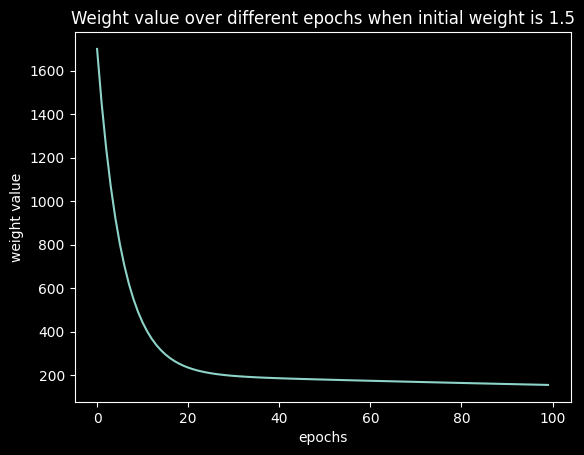

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(w_val)
plt.title('Weight value over different epochs when initial weight is 1.5')
plt.xlabel('epochs')
plt.ylabel('weight value')
plt.grid(False)

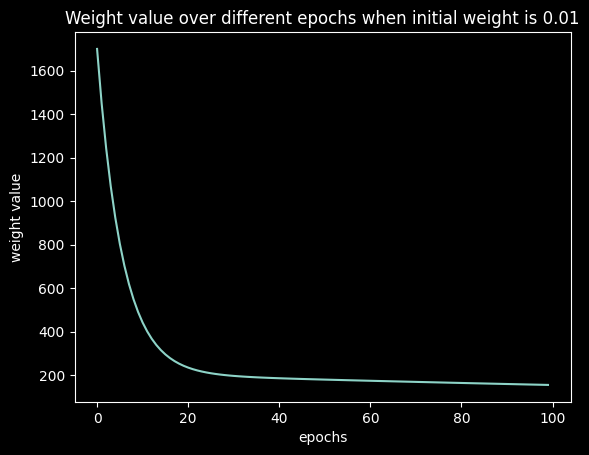

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(w_val)
plt.title('Weight value over different epochs when initial weight is 0.01')
plt.xlabel('epochs')
plt.ylabel('weight value')
plt.grid(False)

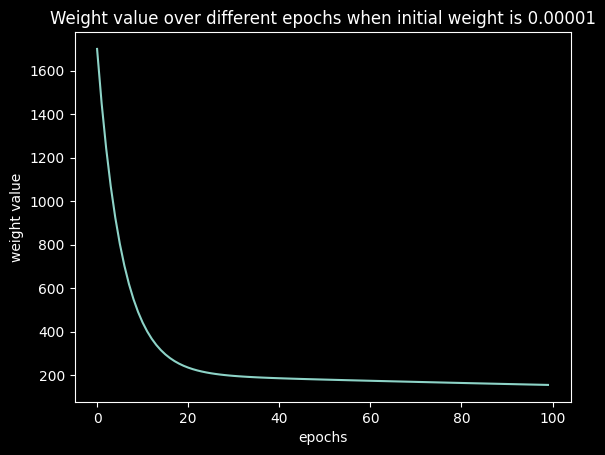

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(w_val)
plt.title('Weight value over different epochs when initial weight is 0.00001')
plt.xlabel('epochs')
plt.ylabel('weight value')
plt.grid(False)

In [43]:
w = list(model.get_weights().copy())
w

[array([[0.36792767]], dtype=float32), array([0.], dtype=float32)]

In [44]:
update_weights(x,y,w,100)

[array([[1.874548]], dtype=float32), array([0.36870822], dtype=float32)]

In [45]:
model.fit(np.array(x), np.array(y), epochs=100, batch_size = 4, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 96ms/step - loss: 19.9774 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.8743 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 9.6394 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 6.7009 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 4.6618 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 3.2468 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 2.2649 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 1.5836 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 1.1107 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7825 - accurac

In [46]:
model.get_weights()

[array([[1.8746138]], dtype=float32), array([0.36865044], dtype=float32)]

# test

min in point [x y f(x,y)]: [1.        1.        7.3890561]


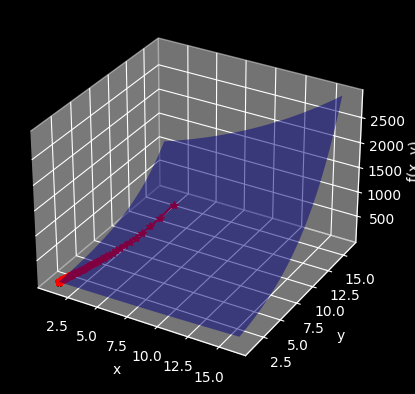

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.exp(np.sqrt(x + 3 * y))

def der_f(x, y):
    common_term = f(x, y) / (2 * np.sqrt(x + 3 * y))
    df_dx = common_term
    df_dy = 3 * common_term
    return np.array([df_dx, df_dy])

alpha = 0.01  # learning rate
num_iterations = 1000

# Initialize x and y within the specified range [1, 16]
x, y = np.random.uniform(1, 16, 2)

# Gradient Descent Loop
path = []  # to store the trajectory of (x, y)
for i in range(num_iterations):
    path.append([x, y, f(x, y)])
    grad = der_f(x, y)
    x -= alpha * grad[0]
    y -= alpha * grad[1]
    x = np.clip(x, 1, 16)
    y = np.clip(y, 1, 16)

path = np.array(path)
min_f_point = path[path[:, 2].argmin()]
print(f'min in point [x y f(x,y)]: {min_f_point}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(np.linspace(1, 16, 100), np.linspace(1, 16, 100))
Z = f(X, Y)
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='jet', rstride=100, cstride=100)

ax.plot(path[:, 0], path[:, 1], f(path[:, 0], path[:, 1]), color='r', marker='*')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()